In [1]:
import pandas as pd

In [2]:
# load the training data
train_df = pd.read_csv("train_data.tsv", 
                       sep = "\t",
                       usecols = ["label","label_binary","text"]
                      )

In [3]:
print(train_df.shape)
train_df.sample(3)

(15928, 3)


,label,label_binary,text
13854,Repetition,Propaganda,grossly negligent
3993,No_Propaganda,No_Propaganda,of the world.\ntake our poll - story continues...
10666,No_Propaganda,No_Propaganda,2018 (LifeSiteNews) – Former Vatican doctrine ...


In [4]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
dummy = DummyClassifier(strategy = "stratified", random_state = 8)

In [6]:
# dummy.fit(train_df["text"],train_df["label_binary"])
dummy.fit(train_df["text"],train_df["label"])

DummyClassifier(constant=None, random_state=8, strategy='stratified')

In [7]:
dev_df = pd.read_csv("dev_data.tsv", 
                       sep = "\t",
                       usecols = ["label","label_binary","text"]
                      )

In [8]:
print(dev_df.shape)
dev_df.sample(3)

(2850, 3)


,label,label_binary,text
1389,"Name_Calling,Labeling",Propaganda,the Mueller report guessing game
1992,Repetition,Propaganda,innocent
2143,No_Propaganda,No_Propaganda,Only 16 countries in the world out of 195 coun...


In [9]:
dummy_y_pred = dummy.predict(dev_df["text"])

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
import matplotlib.pyplot as plt

In [12]:
labels = list(dummy.classes_)
cm = confusion_matrix(dev_df["label"], dummy_y_pred, labels)

In [13]:
# tn, fp, fn, tp = confusion_matrix(dev_df["label_binary"], dummy_y_pred).ravel()
# print(f"TN: {tn}\nFP: {fp}\nFN: {fn}\nTP: {tp}")

# precision = tp/(tp+fp)
# recall = tp/(tp+fn)
# f1 = (2*precision*recall)/(precision+recall)

# print(f"Recall: {round(recall,3)}")
# print(f"Precision: {round(precision,3)}")
# print(f"F1: {round(f1,3)}")

In [14]:
import numpy as np


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=90)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
#     plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.xlabel('Predicted label')
    plt.show()

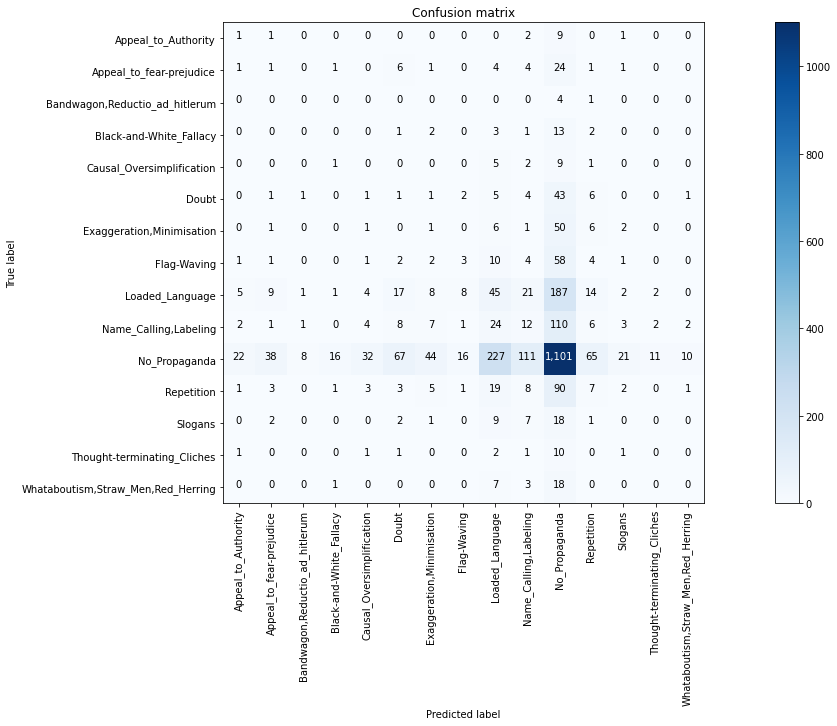

In [15]:
plot_confusion_matrix(cm = cm, target_names = labels, normalize = False)

In [16]:
from sklearn.metrics import classification_report

In [17]:
print(classification_report(dev_df["label"], dummy_y_pred, target_names=labels))

                                    precision    recall  f1-score   support

               Appeal_to_Authority       0.03      0.07      0.04        14
          Appeal_to_fear-prejudice       0.02      0.02      0.02        44
    Bandwagon,Reductio_ad_hitlerum       0.00      0.00      0.00         5
           Black-and-White_Fallacy       0.00      0.00      0.00        22
         Causal_Oversimplification       0.00      0.00      0.00        18
                             Doubt       0.01      0.02      0.01        66
         Exaggeration,Minimisation       0.01      0.01      0.01        68
                       Flag-Waving       0.10      0.03      0.05        87
                   Loaded_Language       0.12      0.14      0.13       324
             Name_Calling,Labeling       0.07      0.07      0.07       183
                     No_Propaganda       0.63      0.62      0.62      1789
                        Repetition       0.06      0.05      0.05       144
           

In [18]:
from sklearn.metrics import f1_score
f1_score(dev_df["label"], dummy_y_pred, average='micro') #semeval uses micro F1

0.4112280701754386